<a href="https://colab.research.google.com/github/dona-frj/semantic/blob/master/Copy_of_dana_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Work on data



In [1]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [2]:
! unzip /content/drive/MyDrive/aquaint.zip -d'/content/data'

Archive:  /content/drive/MyDrive/aquaint.zip
replace /content/data/aquaint/RawText/APW19980603_0791.htm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!unzip aquaint.zip

unzip:  cannot find or open aquaint.zip, aquaint.zip.zip or aquaint.zip.ZIP.


In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize , sent_tokenize
import numpy as np
import pandas as pd
import heapq
import os
from tqdm import tqdm
from gensim.parsing.preprocessing import strip_multiple_whitespaces
from gensim.parsing.preprocessing import strip_non_alphanum ,strip_short
from gensim.parsing.preprocessing import preprocess_documents
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

/////////////////////////// creat data to list

In [6]:
import os
from tqdm import tqdm
path = '/content/data/aquaint/RawText/'
list_txt=[]
tokenized_sent = []
for txt  in os.listdir(path):
  f = open(os.path.join(path,txt), "r")         
  _txt= f.read()
  _txt=strip_multiple_whitespaces(_txt)
  _txt= remove_stopwords(_txt)
  _txt= sent_tokenize(_txt)
  for i in _txt:
    t1=strip_non_alphanum(i)
    t1=strip_short(t1,minsize=3)
    t2=remove_stopwords(t1)
    
  
    list_txt.append(t2)
list_txt

['Iraqi minister arrives Iran attend trade fair Iraq trade minister arrived Wednesday attend international trade fair hold discussions Iranian counterpart Islamic Republic News Agency reported',
 'Mohammed Mehdi Saleh seven member delegation traveled land crossed Iran Khosrawi border point western Kermanshah province official news agency said',
 'quoted Saleh saying discuss Iran Trade Minister Mohammad Shariat Madari ways expanding commercial ties countries',
 'The fair scheduled Oct',
 'This second consecutive year Iraq attending Tehran International Trade Fair points need neighbors business despite traditional animosity',
 'Iran Iraq fought year war ended brokered cease',
 'Iran claims Iraq holds 000 prisoners war Iraq says Iran holding 000 prisoners',
 'More million people killed wounded sides 1980 war',
 'Tehran accuses Baghdad helping Iranian opposition groups sides accuse allowing infiltrators sneak borders acts sabotage',
 'December Iraqi Vice President Taha Yassin Ramadan highe

In [7]:
for s in list_txt:
    tokenized_sent.append(word_tokenize(s.lower()))
len(tokenized_sent)

517

# ////////// Word2Vec///////////////

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['iraqi', 'minister', 'arrives', 'iran', 'attend', 'trade', 'fair', 'iraq', 'trade', 'minister', 'arrived', 'wednesday', 'attend', 'international', 'trade', 'fair', 'hold', 'discussions', 'iranian', 'counterpart', 'islamic', 'republic', 'news', 'agency', 'reported'], tags=[0]),
 TaggedDocument(words=['mohammed', 'mehdi', 'saleh', 'seven', 'member', 'delegation', 'traveled', 'land', 'crossed', 'iran', 'khosrawi', 'border', 'point', 'western', 'kermanshah', 'province', 'official', 'news', 'agency', 'said'], tags=[1]),
 TaggedDocument(words=['quoted', 'saleh', 'saying', 'discuss', 'iran', 'trade', 'minister', 'mohammad', 'shariat', 'madari', 'ways', 'expanding', 'commercial', 'ties', 'countries'], tags=[2]),
 TaggedDocument(words=['the', 'fair', 'scheduled', 'oct'], tags=[3]),
 TaggedDocument(words=['this', 'second', 'consecutive', 'year', 'iraq', 'attending', 'tehran', 'international', 'trade', 'fair', 'points', 'need', 'neighbors', 'business', 'despite', 'tradition

In [9]:
model1 = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model1.wv.vocab
test_doc = word_tokenize("We t want projects success paper inspection t desired results added".lower())
test_doc_vector = model1.infer_vector(test_doc)
try1=model1.docvecs.most_similar(positive = [test_doc_vector])


In [10]:
try1

[(247, 0.955528974533081),
 (272, 0.9532300233840942),
 (366, 0.9531150460243225),
 (387, 0.9521493911743164),
 (19, 0.9483113288879395),
 (21, 0.9480389952659607),
 (277, 0.9471468925476074),
 (251, 0.9470173120498657),
 (175, 0.9454646706581116),
 (153, 0.9448127746582031)]

In [11]:
z=model1.infer_vector(test_doc)
z=np.reshape(z,(1,20))
z.shape

(1, 20)

In [12]:
data1=np.array(list(model1.docvecs.vectors_docs))
len(data1)
print(data1.shape)
data1

(517, 20)


array([[-2.0696975e-01,  6.3200527e-01, -1.7109534e+00, ...,
        -3.6019638e-01,  1.0637985e+00,  3.2839566e-01],
       [-1.0302342e+00,  2.5979653e-01, -4.3557951e-01, ...,
        -9.1628629e-01,  7.8632072e-02,  1.8062754e-01],
       [-6.7341298e-01,  4.7968367e-01, -7.2624063e-01, ...,
         2.5495726e-01,  6.3580686e-01,  8.7198839e-02],
       ...,
       [-1.1084244e+00, -2.9684323e-01,  4.0146518e-01, ...,
        -6.7601585e-01, -3.4704965e-01,  2.0536445e-01],
       [-3.9742643e-01, -1.7723990e-04,  7.4431121e-02, ...,
        -1.9936866e-01, -1.0504564e-01, -2.3584800e-02],
       [ 1.6684573e-02, -1.0072230e-02, -2.2145895e-02, ...,
         2.4450850e-02, -1.4415383e-02, -1.2039491e-02]], dtype=float32)

# Word2Vec with Affinity 

In [13]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial.distance import pdist

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Estimated number of clusters: 9
Homogeneity: 0.345
Completeness: 1.000
V-measure: 0.513
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


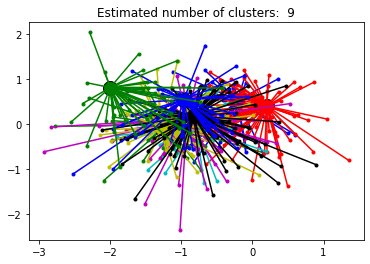

In [14]:
#generate data
centers=data1
X, labels_true = make_blobs(n_samples = len(data1), centers = centers, cluster_std = 0.5, random_state = 0)

# Compute Affinity Propagation
af = AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

////////////////////////////////////////////////////////////////////////////////////test//////////////////////////////


In [15]:
test_doc = word_tokenize("Syria opposes attempt overthrow Saddam Hussein Syria opposes attempts United States Britain overthrow Iraqi leader Saddam Hussein Syrian Vice President Abdul Halim Khaddam said Thursday".lower())
Y1 = model1.infer_vector(test_doc)
Y1=np.reshape(Y1,(1,20))

In [16]:
af_clustered_sentences= [[] for i in range(n_clusters_ )]
for sentence_id, cluster_id in enumerate(labels):
    af_clustered_sentences[cluster_id].append(list_txt[sentence_id])

for i, cluster in enumerate(af_clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")



Cluster  1
['Iraqi minister arrives Iran attend trade fair Iraq trade minister arrived Wednesday attend international trade fair hold discussions Iranian counterpart Islamic Republic News Agency reported', 'The fair scheduled Oct', 'Iranian POW negotiator holds talks Iraqi ministers The head Iran prisoner war commission met Iraqi Cabinet ministers Saturday bid glean information thousands Iranian POWs allegedly Iraq official Iraqi News Agency reported', 'second picture storm appeared process breaking', 'largest repatriation Iranian Iraqi POWs 1990 said International Committee Red Cross supervised swap', '', 'The refused travel South Africa demanding better pay conditions tour', 'The objects flown Italy week pieces loaned museum antiquities exhibit according statement issued Getty Monday', 'United flights left terminal search landed United gates', 'ambitious modern wide ranging efficient agreement Portugal Prime Minister Antonio Guterres said end summit Albufeira 200 kilometers 125 miles

Cluster  0
['Iraqi minister arrives Iran attend trade fair Iraq trade minister arrived Wednesday attend international trade fair hold discussions Iranian counterpart Islamic Republic News Agency reported', 'The fair scheduled Oct', 'Iranian POW negotiator holds talks Iraqi ministers The head Iran prisoner war commission met Iraqi Cabinet ministers Saturday bid glean information thousands Iranian POWs allegedly Iraq official Iraqi News Agency reported', 'second picture storm appeared process breaking', 'largest repatriation Iranian Iraqi POWs 1990 said International Committee Red Cross supervised swap', '', 'The refused travel South Africa demanding better pay conditions tour', 'The objects flown Italy week pieces loaned museum antiquities exhibit according statement issued Getty Monday', 'United flights left terminal search landed United gates', 'ambitious modern wide ranging efficient agreement Portugal Prime Minister Antonio Guterres said end summit Albufeira 200 kilometers 125 miles

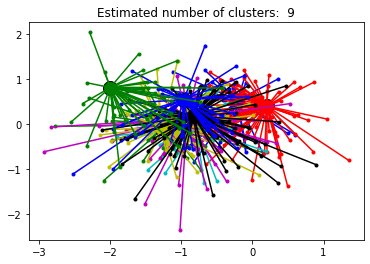

In [17]:
centers=data1
X, labels_true = make_blobs(n_samples = len(data1), centers = centers, cluster_std = 0.5, random_state = 0)

# Compute Affinity Propagation
af = AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

af_clustered_sentences= [[] for i in range(n_clusters_ )]
for sentence_id, cluster_id in enumerate(labels):
    af_clustered_sentences[cluster_id].append(list_txt[sentence_id])

for i, cluster in enumerate(af_clustered_sentences):
    print("Cluster ", i)
    print(cluster)
    print("")

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))



y=af.predict(Y1)
af_pred=y[0]
max_simil=[]
for sent in af_clustered_sentences[af_pred]:
  s=model1.infer_vector([sent.lower()])
  s =np.reshape(s,(1,20))[0]
  sim = cosine(Y1,s)

  max_simil.append(sim[0])

max_similtery=heapq.nlargest(10,enumerate(max_simil),key=lambda x:x[1])
indices, vals = zip(*max_similtery)
indices=list(indices)
vals=list(vals)

print("/////////////////////////////////////////////////////")
for i ,j in zip(indices, vals):
  
  x= af_clustered_sentences[af_pred][i]
  print(x ,   j )

print("predict: ", y[0])

# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

# kmean with word vector

In [18]:



X=data1

true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
label=model.labels_
clustered_sentences = [[] for i in range(true_k )]
for sentence_id, cluster_id in enumerate(label):
    clustered_sentences[cluster_id].append(list_txt[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

print("Top terms per cluster:")


print("\n")
print("Prediction")



y_kmeans=model.predict(Y1)
pred = y_kmeans[0]
print(y_kmeans[0])
print('/////////////////////////////////////////')
max_simil=[]
for sent in clustered_sentences[pred]:
  s=model1.infer_vector([sent.lower()])
  s =np.reshape(s,(1,20))[0]
  sim = cosine(Y1,s)

  max_simil.append(sim[0])

max_similtery=heapq.nlargest(10,enumerate(max_simil),key=lambda x:x[1])
indices, vals = zip(*max_similtery)
indices=list(indices)
vals=list(vals)

print("/////////////////////////////////////////////////////")
for i ,j in zip(indices, vals):
  
  x= clustered_sentences[pred][i]
  print(x ,   j )

#score = silhouette_score(X, label, metric='euclidean')
#print(score)

Cluster  1
['related federal cabinet ordered energy officials draw discussion paper changing laws governing domestic electricity market', 'Report Plane robbed gunmen Nigerian airport Air Afrique Boeing 727 jet passenger liner looted past month armed robbers awaiting takeoff Nigeria largest international airport Lagos Guardian newspaper reported Thursday', 'Security personnel duty later said said unable capture culprits security vehicle taken away routine maintenance', 'Nigeria Africa populous country notoriously high rate violent crime accompanied breakdown law order years military rule', 'The apparent settlement came days talks involving West Indies players officials West Indies South Africa cricket boards', 'The crisis came head Wednesday West Indies Cricket Board fired superstar batsman Brian Lara captain Carl Hooper vice captain', 'Ali Bacher head South African cricket directly involved Monday talks sitting sidelines Sunday', 'Word agreement leaked captain Courtney Walsh head West 

# ///////////////////////Bert////////////////////////

In [19]:
pip install transformers 

In [20]:
!pip install sentence-transformers

In [21]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [22]:
sentence_embeddings = sbert_model.encode(list_txt)

#print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
#print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

In [23]:
len(sentence_embeddings)

517

# BERT with Kmean/////

In [24]:

# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 7
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(sentence_embeddings)
cluster_assignment = clustering_model.labels_

In [25]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(list_txt[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['More million people killed wounded sides 1980 war', 'Stolen painting New Zealand recovered man arrested 19th century painting worth dlrs million stolen Auckland Art Gallery days ago recovered police said Monday', 'Gary Allcock said understood person arrested theft 1874 oil Still Top French born artist Jacques Joseph James Tissot New Zealand expensive popular European works', 'The painting valued dlrs million stolen Aug man armed shotgun daring robbery Auckland Art Gallery', 'The man clad black wearing motorcycle helmet dark visor gloves burst main door sawed shotgun crowbar', 'Museum official Kate Darrow said man ran Grey Gallery waving firearm yelling staff patrons', 'The gunman grabbed painting wall dropped ground', 'The robber left main entrance skirted gallery Albert Park pursued member public', 'believed climbed motorcycle escaped nearby highway', 'More million people killed wounded Iran Iraq War', 'Jan 1986 Challenger explodes killing seven board', 'The Iran Iraq war

In [26]:
#Y = vectorizer.transform(["chrome browser to open."])
test_doc = ["Syria opposes attempt overthrow Saddam Hussein Syria opposes attempts United States Britain overthrow Iraqi leader Saddam Hussein Syrian Vice President Abdul Halim Khaddam said Thursday".lower()]
Y1=sbert_model.encode(test_doc)



In [27]:


X=sentence_embeddings

true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
label=model.labels_




print('/////////////////////////////////////////')

clustered_sentences = [[] for i in range(true_k )]
for sentence_id, cluster_id in enumerate(label):
    clustered_sentences[cluster_id].append(list_txt[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i)
    print(cluster)
    print("")
print('/////////////////////////////////////////')




print("\n")
print("Prediction")

y_kmeans=model.predict(Y1)
pred = y_kmeans[0]
print(y_kmeans[0])
print('/////////////////////////////////////////')
max_simil=[]

for sent in clustered_sentences[pred ]:
  sim = cosine(Y1, sbert_model.encode([sent.lower()])[0])
  max_simil.append(sim[0])


max_similtery=heapq.nlargest(10,enumerate(max_simil),key=lambda x:x[1])
indices, vals = zip(*max_similtery)
indices=list(indices)
vals=list(vals)

print("/////////////////////////////////////////////////////")
for i ,j in zip(indices, vals):
  
  x= clustered_sentences[pred][i]
  print(x ,   j )


/////////////////////////////////////////
Cluster  0
['Iran claims Iraq holds 000 prisoners war Iraq says Iran holding 000 prisoners', 'More million people killed wounded sides 1980 war', 'Stolen painting New Zealand recovered man arrested 19th century painting worth dlrs million stolen Auckland Art Gallery days ago recovered police said Monday', 'The painting valued dlrs million stolen Aug man armed shotgun daring robbery Auckland Art Gallery', 'The man clad black wearing motorcycle helmet dark visor gloves burst main door sawed shotgun crowbar', 'The gunman grabbed painting wall dropped ground', 'More million people killed wounded Iran Iraq War', 'Bands clouds spiraled counterclockwise motion 200 mile wide eye center storm taking shape resembled hurricanes Earth astronomers said', 'The service place Saarbruecken travelers drop bags day', 'Jan 1986 Challenger explodes killing seven board', 'The Iran Iraq war million people killed wounded ended 1988', 'moved headquarters Prague 1995 fo

# //////////////// afinty with bert

517
517
predict:  8
Cluster  0
['Iraqi minister arrives Iran attend trade fair Iraq trade minister arrived Wednesday attend international trade fair hold discussions Iranian counterpart Islamic Republic News Agency reported']

Cluster  1
['Mohammed Mehdi Saleh seven member delegation traveled land crossed Iran Khosrawi border point western Kermanshah province official news agency said']

Cluster  2
['quoted Saleh saying discuss Iran Trade Minister Mohammad Shariat Madari ways expanding commercial ties countries']

Cluster  3
['The fair scheduled Oct']

Cluster  4
['This second consecutive year Iraq attending Tehran International Trade Fair points need neighbors business despite traditional animosity']

Cluster  5
['Iran Iraq fought year war ended brokered cease']

Cluster  6
['Iran claims Iraq holds 000 prisoners war Iraq says Iran holding 000 prisoners']

Cluster  7
['More million people killed wounded sides 1980 war']

Cluster  8
['Tehran accuses Baghdad helping Iranian opposition gr

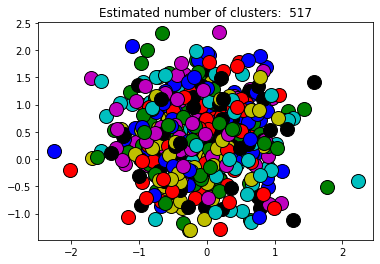

In [28]:
centers=sentence_embeddings
X, labels_true2 = make_blobs(n_samples = len(sentence_embeddings), centers = centers, cluster_std = 0.5, random_state = 0)

# Compute Affinity Propagation
af2 = AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices2 = af2.cluster_centers_indices_
labels2 = af2.labels_
print(len(labels2))
n_clusters_2 = len(cluster_centers_indices2)
print(n_clusters_2)
print("predict: ", y[0])

# Compute Affinity Propagation
af = AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)




af_clustered_sentences_bert= [[] for i in range(n_clusters_2 )]
for sentence_id, cluster_id in enumerate(labels2):
    af_clustered_sentences_bert[cluster_id].append(list_txt[sentence_id])

for i, cluster in enumerate(af_clustered_sentences_bert):
    print("Cluster ", i)
    print(cluster)
    print("")
print('Estimated number of clusters: %d' % n_clusters_2)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true2, labels2))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true2, labels2))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true2, labels2))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true2, labels2))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true2, labels2))



y=af2.predict(Y1)
af2_pred=y[0]
max_simil2=[]

for sent in af_clustered_sentences_bert[af2_pred]:
  sim = cosine(Y1, sbert_model.encode([sent.lower()])[0])
  max_simil2.append(sim[0])



max_similtery=heapq.nlargest(10,enumerate(max_simil2),key=lambda x:x[1])
indices, vals = zip(*max_similtery)
indices=list(indices)
vals=list(vals)

print("/////////////////////////////////////////////////////")
for i ,j in zip(indices, vals):
  
  x= af_clustered_sentences_bert[af_pred][i]
  print(x ,  j )

print("predict: ", y[0])

# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()


# ////////////////// Xlnet///////////

In [29]:
!pip install transformers
!pip install sentencepiece

In [30]:


from transformers import AdamW, XLNetTokenizer, XLNetModel, XLNetLMHeadModel, XLNetConfig
from keras.preprocessing.sequence import pad_sequences
from transformers import XLNetTokenizer, TFXLNetForQuestionAnsweringSimple
PRE_TRAINED_MODEL_NAME = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

In [31]:
def tokenize_inputs(text_list, tokenizer, num_embeddings=200):
    """
    Tokenizes the input text input into ids. Appends the appropriate special
    characters to the end of the text to denote end of sentence. Truncate or pad
    the appropriate sequence length.
    """
    # tokenize the text, then truncate sequence to the desired length minus 2 for
    # the 2 special characters
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t)[:num_embeddings-2], text_list))
    # convert tokenized text into numeric ids for the appropriate LM
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    # append special token "<s>" and </s> to end of sentence
    input_ids = [tokenizer.build_inputs_with_special_tokens(x) for x in input_ids]
    # pad sequences
    input_ids = pad_sequences(input_ids, maxlen=num_embeddings, dtype="long", truncating="post", padding="post")
    return input_ids


def create_attn_masks(input_ids):
    """
    Create attention masks to tell model whether attention should be applied to
    the input id tokens. Do not want to perform attention on padding tokens.
    """
    # Create attention masks
    attention_masks = []

    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)
    return attention_masks    

In [32]:
text= tokenize_inputs(list_txt, tokenizer, num_embeddings=512)
text

array([[ 1582,  1026, 11209, ...,     0,     0,     0],
       [ 6305, 12617,  1528, ...,     0,     0,     0],
       [ 2470, 21482,   591, ...,     0,     0,     0],
       ...,
       [   32,   485,  1200, ...,     0,     0,     0],
       [   32,  7866, 10035, ...,     0,     0,     0],
       [    4,     3,     0, ...,     0,     0,     0]])

In [33]:
train_attention_masks = create_attn_masks(text)
print(train_attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

# k-mean with XLNET

In [35]:
test_doc = ["i like google and all news in tv with play sport ".lower()]

Y1=tokenize_inputs(test_doc, tokenizer, num_embeddings=512)
Y1= create_attn_masks(Y1)

In [36]:
num_clusters = 7
xlnet_model = KMeans(n_clusters=num_clusters)
#from sklearn.metrics.pairwise import cosine_distances
#word_cosine = cosine_distances(sentence_embeddings)
xlnet_model.fit(train_attention_masks)
xlnet_assignment = xlnet_model.labels_




print('/////////////////////////////////////////')
xlnet_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(xlnet_assignment):
    xlnet_sentences[cluster_id].append(list_txt[sentence_id])

for i, cluster in enumerate(xlnet_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")
print('/////////////////////////////////////////')




print("\n")
print("Prediction")

y_kmeans=xlnet_model.predict(Y1)
pred = y_kmeans[0]
print(y_kmeans[0])
print('/////////////////////////////////////////')
max_simil=[]

for sent in xlnet_sentences[pred ]:
  sim=tokenize_inputs(sent.lower(), tokenizer, num_embeddings=512)
  sim= create_attn_masks(sim)
  sim = cosine(Y1, sim[0])
  max_simil.append(sim[0])


max_similtery=heapq.nlargest(10,enumerate(max_simil),key=lambda x:x[1])
indices, vals = zip(*max_similtery)
indices=list(indices)
vals=list(vals)
print(vals)
print("/////////////////////////////////////////////////////")
for i ,j in zip(indices, vals):
  
  x= xlnet_sentences[pred][i]
  print(x ,   j )


/////////////////////////////////////////
Cluster  1
['Iran Iraq fought year war ended brokered cease', 'More million people killed wounded sides 1980 war', 'crowbar remove canvas frame backing board', 'Iraq long maintained released Iranian prisoners captured 1980 Iran Iraq War', 'More million people killed wounded Iran Iraq War', 'unrealistic build power stations environmental concerns government said', 'The government envisages creation national company power infrastructure', 'timeframe carrying liberalization electricity market remains determined cabinet said', 'ordered study possibility tax breaks hydroelectric plants encourage upgrades plants', 'Two pictures taken hours apart April showed storm moved slightly eastward', 'The goal easier travel train Lufthansa main hub Frankfurt instead flying', 'Shepard Glenn set milestones May 1961 Alan Shepard American space', 'July 1969 Apollo Neil Armstrong Buzz Aldrin land moon', 'July 1975 American Apollo Soviet Soyuz spacecraft link orbit',

#////////////////////////////// affinty xlnet

In [38]:
centers=train_attention_masks
X, labels_true2 = make_blobs(n_samples = len(train_attention_masks), centers = centers, cluster_std = 0.5, random_state = 0)

# Compute Affinity Propagation
af2 = AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices2 = af2.cluster_centers_indices_
labels2 = af2.labels_
print(len(labels2))
n_clusters_2 = len(cluster_centers_indices2)
print(n_clusters_2)

# Compute Affinity Propagation



af_clustered_sentences_xlnet= [[] for i in range(n_clusters_2 )]
for sentence_id, cluster_id in enumerate(labels2):
    af_clustered_sentences_xlnet[cluster_id].append(list_txt[sentence_id])

for i, cluster in enumerate(af_clustered_sentences_xlnet):
    print("Cluster ", i)
    print(cluster)
    print("")




y=af2.predict(Y1)
af2_pred=y[0]
max_simil2=[]

for sent in af_clustered_sentences_xlnet[af2_pred]:
  sim=tokenize_inputs(sent.lower(), tokenizer, num_embeddings=512)
  sim= create_attn_masks(sim)
  sim = cosine(Y1, sim[0])
  max_simil2.append(sim[0])




max_similtery=heapq.nlargest(10,enumerate(max_simil2),key=lambda x:x[1])
indices, vals = zip(*max_similtery)
indices=list(indices)
vals=list(vals)

print("/////////////////////////////////////////////////////")
for i ,j in zip(indices, vals):
  
  x= af_clustered_sentences_xlnet[af2_pred][i]
  print(x ,  j )

print("predict: ", y[0])

517
517
Cluster  0
['Iraqi minister arrives Iran attend trade fair Iraq trade minister arrived Wednesday attend international trade fair hold discussions Iranian counterpart Islamic Republic News Agency reported']

Cluster  1
['Mohammed Mehdi Saleh seven member delegation traveled land crossed Iran Khosrawi border point western Kermanshah province official news agency said']

Cluster  2
['quoted Saleh saying discuss Iran Trade Minister Mohammad Shariat Madari ways expanding commercial ties countries']

Cluster  3
['The fair scheduled Oct']

Cluster  4
['This second consecutive year Iraq attending Tehran International Trade Fair points need neighbors business despite traditional animosity']

Cluster  5
['Iran Iraq fought year war ended brokered cease']

Cluster  6
['Iran claims Iraq holds 000 prisoners war Iraq says Iran holding 000 prisoners']

Cluster  7
['More million people killed wounded sides 1980 war']

Cluster  8
['Tehran accuses Baghdad helping Iranian opposition groups sides a